<a href="https://colab.research.google.com/github/hakmin1015/PowerSystemEconomics/blob/main/etc/Practice/Boston_house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 다중선형회귀분석 및 데이터 시각화 연습

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd /content/drive/MyDrive/LoadForecasting/
!pwd

/content/drive/MyDrive/LoadForecasting
/content/drive/MyDrive/LoadForecasting


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# 데이터 불러오기
boston = pd.read_csv("Boston_house.csv")
boston_data = boston.drop(['Target'], axis=1)

# crim, rm, lstat을 통한 다중 선형회귀분석
x_data = boston[["CRIM","RM","LSTAT"]] #변수 여러개
target = boston[["Target"]]

# for b0, 상수항 추가
x_data1 = sm.add_constant(x_data, has_constant = "add")

# OLS 검정
multi_model = sm.OLS(target, x_data1)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

Index(['AGE', 'B', 'RM', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO',
       'RAD', 'ZN', 'TAX', 'CHAS', 'Target'],
      dtype='object')

In [ ]:
# crim, rm, lstat, b ,tax ,age, zn, nox, indus 변수를 통한 다중선형회귀분석

## boston data에서 원하는 변수만 뽑아오기
x_data2 = boston[['CRIM','RM', 'LSTAT', 'B', 'TAX', 'AGE', 'ZN', 'NOX', 'INDUS']]
x_data2.head()

,CRIM,RM,LSTAT,B,TAX,AGE,ZN,NOX,INDUS
0,0.00632,6.575,4.98,396.90,296,65.2,18.0,0.538,2.31
1,0.02731,6.421,9.14,396.90,242,78.9,0.0,0.469,7.07
2,0.02729,7.185,4.03,392.83,242,61.1,0.0,0.469,7.07
3,0.03237,6.998,2.94,394.63,222,45.8,0.0,0.458,2.18
4,0.06905,7.147,5.33,396.90,222,54.2,0.0,0.458,2.18


In [ ]:
# 상수항 추가
x_data2_ = sm.add_constant(x_data2, has_constant = "add")

# 회귀모델 적합
multi_model2 = sm.OLS(target, x_data2_)
fitted_multi_model2 = multi_model2.fit()

# 결과 출력
fitted_multi_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 28 Apr 2024   Prob (F-statistic):          5.76e-111
Time:                        12:08:47   Log-Likelihood:                -1565.5
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     496   BIC:                             3193.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.1088      3.828     -1.857      0.064     -14.631       0.413
CRIM          -0.0453      0.036     -1.269      0.205      -0.115       0.025
RM             5.0922      0.458     11.109      0.000       4.192       5.993
LSTAT         -0.5651      0.057     -9.854      0.000      -0.678      -0.452
B              0.0090      0.003      2.952      0.003       0.003       0.015
TAX           -0.0060      0.002     -2.480      0.013      -0.011      -0.001
AGE            0.0236      0.014      1.653      0.099      -0.004       0.052
ZN             0.0294      0.013      2.198      0.028       0.003       0.056
NOX            3.4838      3.833      0.909      0.364      -4.047      11.014
INDUS          0.0293      0.065      0.449      0.654      -0.099       0.157
==============================================================================
Omnibus:                      195.490   Durbin-Watson:                   0.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              872.873
Skew:                           1.686   Prob(JB):                    2.87e-190
Kurtosis:                       8.479   Cond. No.                     1.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# 세 변수 다중회귀모델의 계수

fitted_multi_model.params

const   -2.562251
CRIM    -0.102941
RM       5.216955
LSTAT   -0.578486
dtype: float64

In [ ]:
# full모델의 회귀계수

fitted_multi_model2.params

const   -7.108827
CRIM    -0.045293
RM       5.092238
LSTAT   -0.565133
B        0.008974
TAX     -0.006025
AGE      0.023619
ZN       0.029377
NOX      3.483832
INDUS    0.029270
dtype: float64

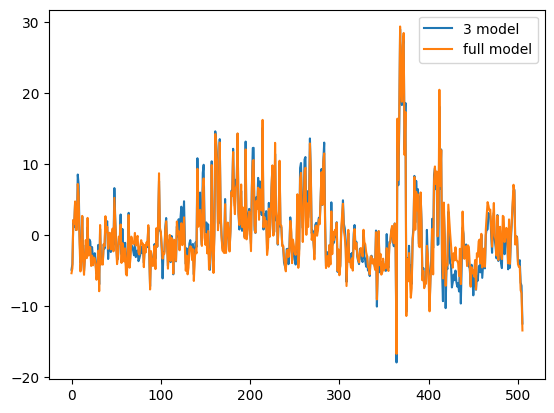

In [ ]:
# 3개 모델과 full모델의 잔차비교

import matplotlib.pyplot as plt
fitted_multi_model.resid.plot(label = "3 model")
fitted_multi_model2.resid.plot(label = "full model")
plt.legend()

In [ ]:
# 상관행렬 보기
x_data2.corr()

,CRIM,RM,LSTAT,B,TAX,AGE,ZN,NOX,INDUS
CRIM,1.000000,-0.219247,0.455621,-0.385064,0.582764,0.352734,-0.200469,0.420972,0.406583
RM,-0.219247,1.000000,-0.613808,0.128069,-0.292048,-0.240265,0.311991,-0.302188,-0.391676
LSTAT,0.455621,-0.613808,1.000000,-0.366087,0.543993,0.602339,-0.412995,0.590879,0.603800
B,-0.385064,0.128069,-0.366087,1.000000,-0.441808,-0.273534,0.175520,-0.380051,-0.356977
TAX,0.582764,-0.292048,0.543993,-0.441808,1.000000,0.506456,-0.314563,0.668023,0.720760
AGE,0.352734,-0.240265,0.602339,-0.273534,0.506456,1.000000,-0.569537,0.731470,0.644779
ZN,-0.200469,0.311991,-0.412995,0.175520,-0.314563,-0.569537,1.000000,-0.516604,-0.533828
NOX,0.420972,-0.302188,0.590879,-0.380051,0.668023,0.731470,-0.516604,1.000000,0.763651
INDUS,0.406583,-0.391676,0.603800,-0.356977,0.720760,0.644779,-0.533828,0.763651,1.000000


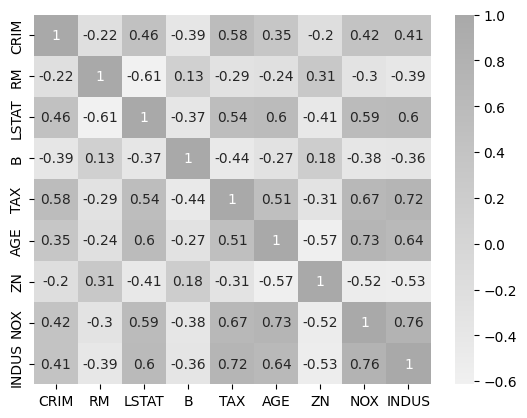

In [ ]:
# 상관행렬 시각화
import seaborn as sns                        #heatmap 만들기 위한 라이브러리
cmap = sns.light_palette("darkgray", as_cmap = True)
sns.heatmap(x_data2.corr(), annot = True, cmap = cmap)
plt.show()

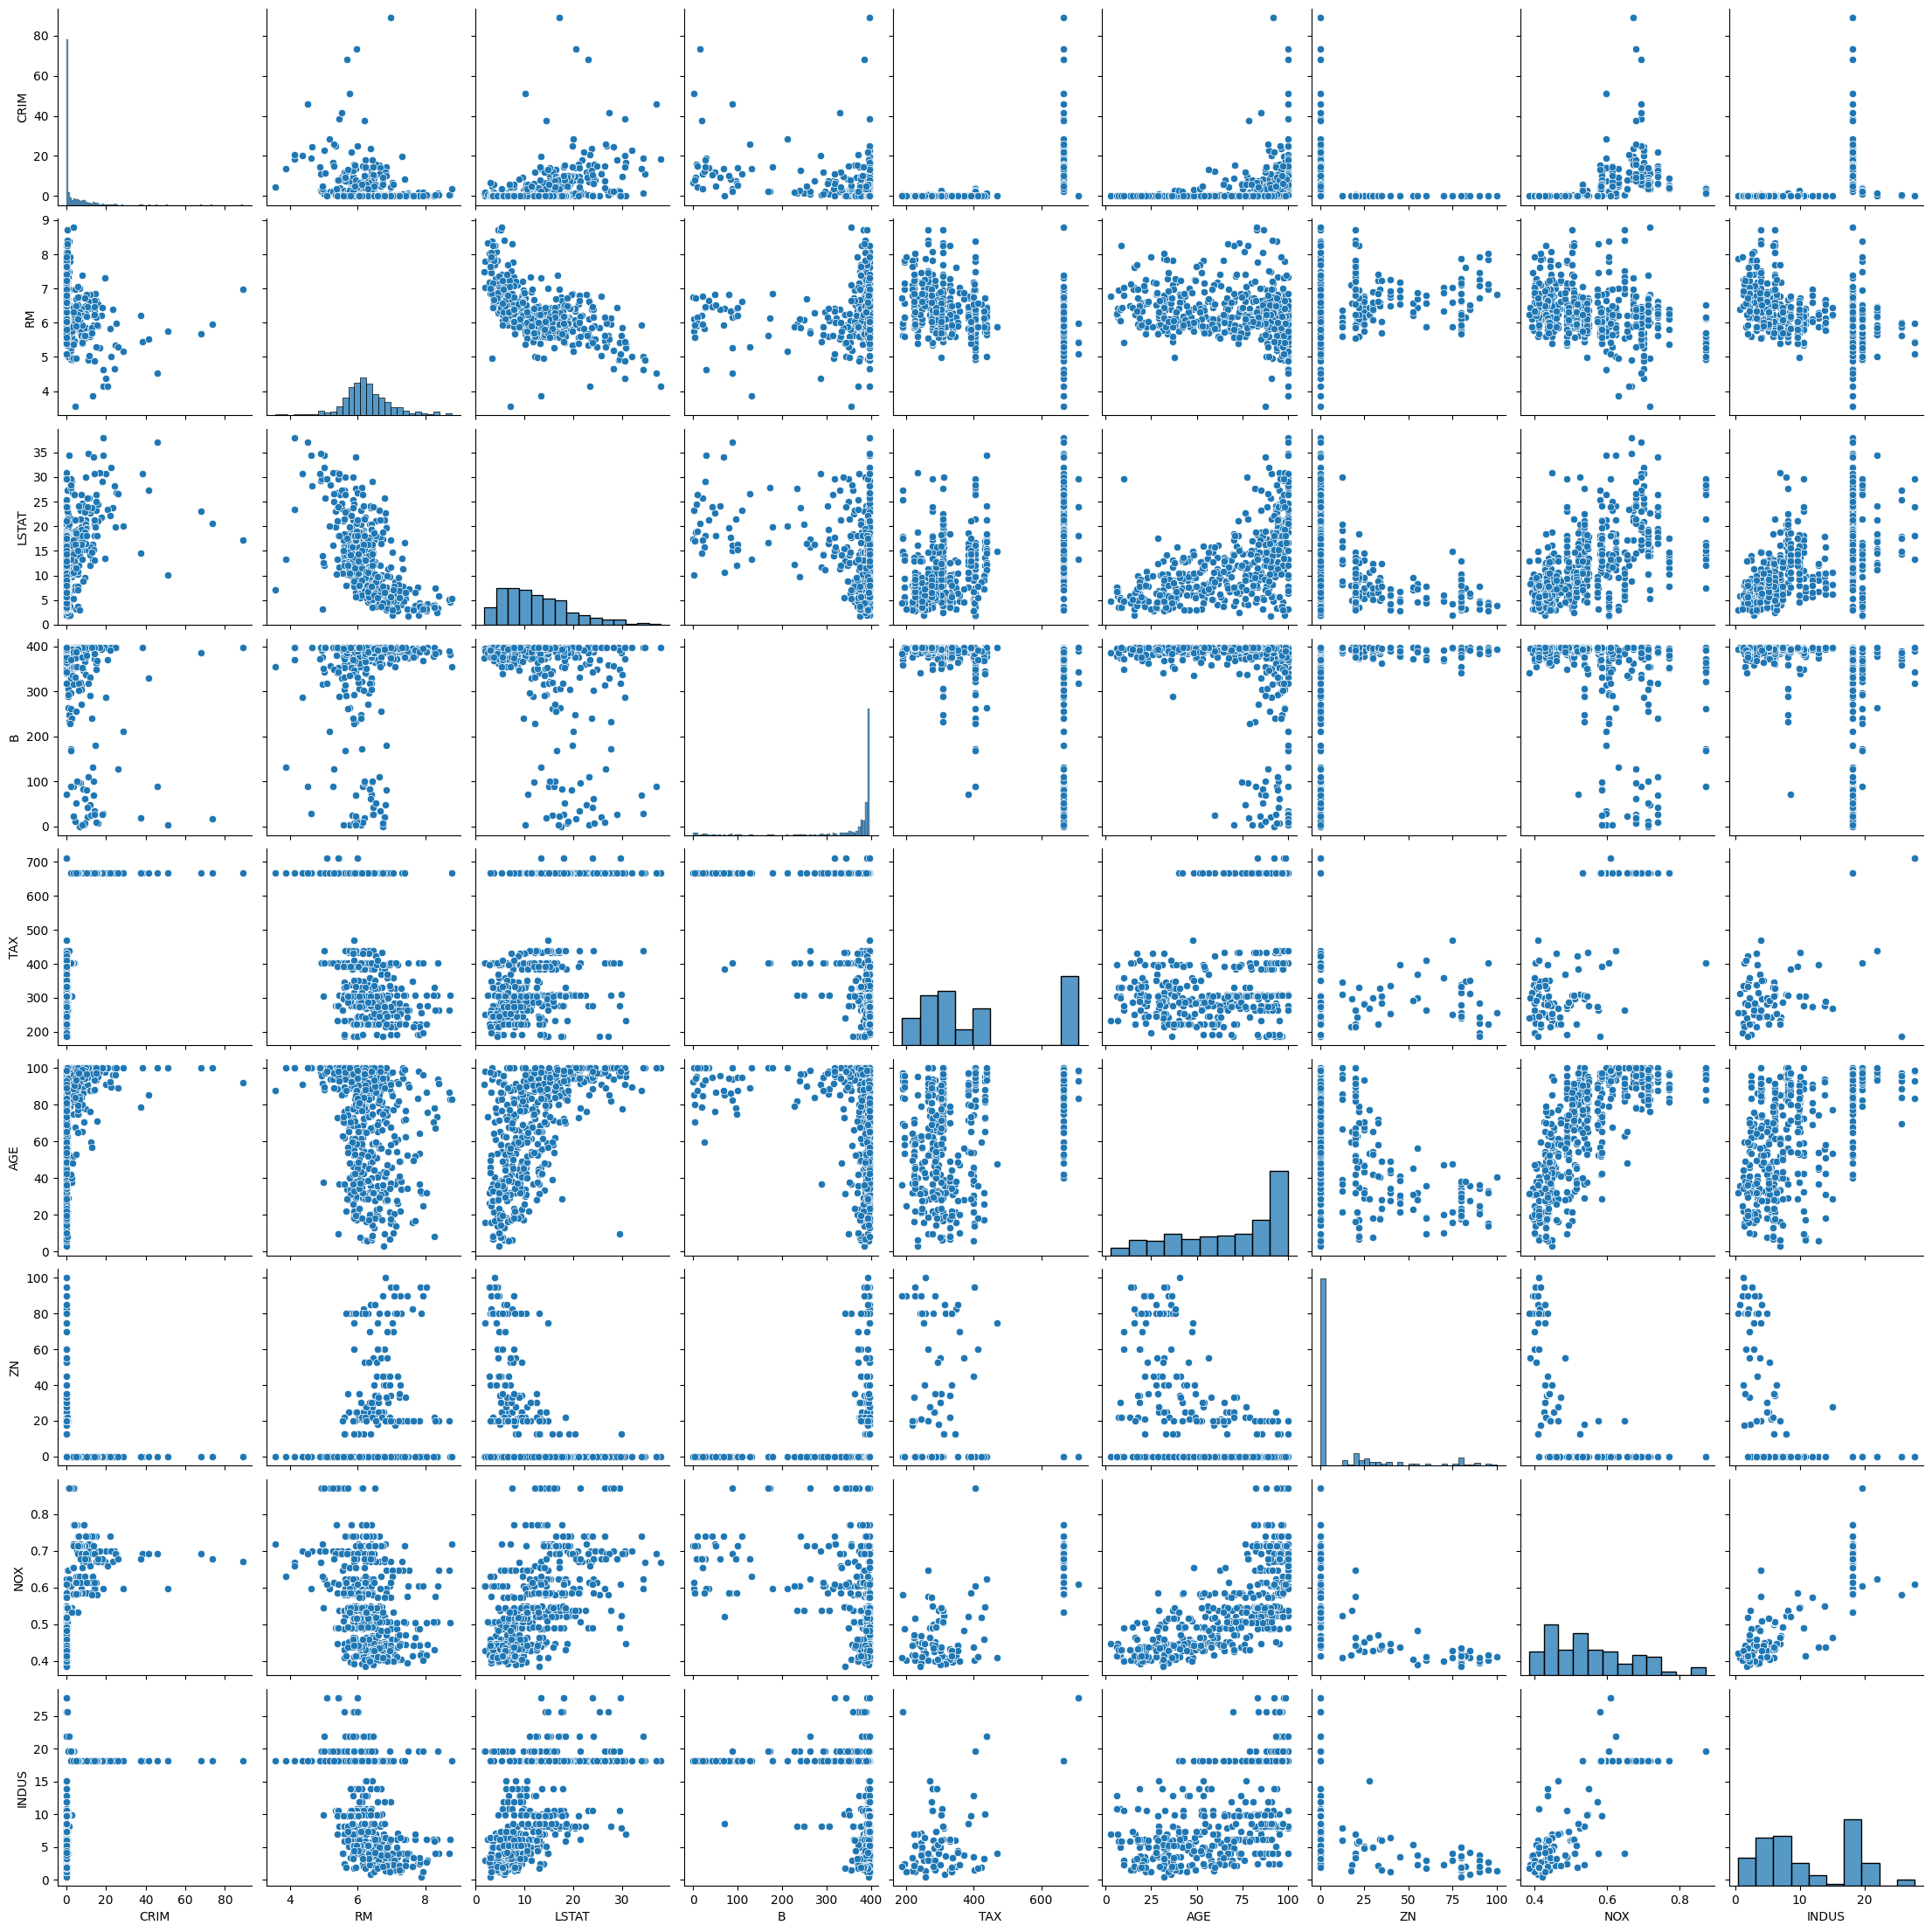

In [ ]:
# 변수끼리 산점도를 시각화
sns.pairplot(x_data2)
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF사용을 위한 라이브러리, statsmodels안에 존재한다.
# 사실 모든 통계기법이 statsmodels 모듈에 존재하여
# 이 중에 필요한 통계기법을 찾아 import를 진행하면 된다.

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_data2.values, i) for i in range(x_data2.shape[1])]
vif["features"] = x_data2.columns
vif

,VIF Factor,features
0,1.917332,CRIM
1,46.535369,RM
2,8.844137,LSTAT
3,16.856737,B
4,19.923044,TAX
5,18.457503,AGE
6,2.086502,ZN
7,72.439753,NOX
8,12.642137,INDUS


In [ ]:
# nox 변수 제거 후 vif 확인

vif = pd.DataFrame()
x_data3 = x_data2.drop("NOX",axis=1)
vif["VIF Factor"] = [variance_inflation_factor(x_data3.values, i) for i in range(x_data3.shape[1])]
vif["features"] = x_data3.columns
vif

,VIF Factor,features
0,1.916648,CRIM
1,30.806301,RM
2,8.171214,LSTAT
3,16.735751,B
4,18.727105,TAX
5,16.339792,AGE
6,2.074500,ZN
7,11.217461,INDUS


In [ ]:
# RM 변수 제거후 VIF확인

vif = pd.DataFrame()
x_data4 = x_data3.drop("RM",axis = 1)
vif["VIF Factor"] = [variance_inflation_factor(x_data4.values, i) for i in range(x_data4.shape[1])]
vif["features"] = x_data4.columns
vif

,VIF Factor,features
0,1.907517,CRIM
1,7.933529,LSTAT
2,7.442569,B
3,16.233237,TAX
4,13.765377,AGE
5,1.820070,ZN
6,11.116823,INDUS


In [ ]:
# nox 변수를 제거한 x_data3 상수항 추가 후 회귀모델 적합시키기
# nox, rm 변수를 제거한 x_data4 상수항 추가 후 회귀모델 적합시키기

x_data3_ = sm.add_constant(x_data3, has_constant = "add")
x_data4_ = sm.add_constant(x_data4, has_constant = "add")

model_vif = sm.OLS(target, x_data3_)
fitted_model_vif = model_vif.fit()
fitted_model_vif.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     121.6
Date:                Sun, 28 Apr 2024   Prob (F-statistic):          7.62e-112
Time:                        14:00:44   Log-Likelihood:                -1566.0
No. Observations:                 506   AIC:                             3150.
Df Residuals:                     497   BIC:                             3188.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.9162      3.596     -1.645      0.101     -12.981       1.149
CRIM          -0.0451      0.036     -1.264      0.207      -0.115       0.025
RM             5.1027      0.458     11.138      0.000       4.203       6.003
LSTAT         -0.5628      0.057     -9.825      0.000      -0.675      -0.450
B              0.0087      0.003      2.880      0.004       0.003       0.015
TAX           -0.0056      0.002     -2.344      0.019      -0.010      -0.001
AGE            0.0287      0.013      2.179      0.030       0.003       0.055
ZN             0.0284      0.013      2.130      0.034       0.002       0.055
INDUS          0.0486      0.062      0.789      0.431      -0.072       0.170
==============================================================================
Omnibus:                      193.530   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              843.773
Skew:                           1.677   Prob(JB):                    5.98e-184
Kurtosis:                       8.364   Cond. No.                     8.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# 두 vif를 통한 변수제거 회귀모델의 결과를 비교

model_vif2 = sm.OLS(target,x_data4_)
fitted_model_vif2 = model_vif2.fit()

fitted_model_vif2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     97.20
Date:                Sun, 28 Apr 2024   Prob (F-statistic):           5.53e-89
Time:                        14:01:16   Log-Likelihood:                -1622.3
No. Observations:                 506   AIC:                             3261.
Df Residuals:                     498   BIC:                             3294.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.6634      1.844     16.087      0.000      26.041      33.286
CRIM          -0.0329      0.040     -0.825      0.410      -0.111       0.045
LSTAT         -0.9256      0.053    -17.589      0.000      -1.029      -0.822
B              0.0046      0.003      1.384      0.167      -0.002       0.011
TAX           -0.0048      0.003     -1.814      0.070      -0.010       0.000
AGE            0.0703      0.014      4.993      0.000       0.043       0.098
ZN             0.0513      0.015      3.490      0.001       0.022       0.080
INDUS         -0.0357      0.068     -0.523      0.601      -0.170       0.098
==============================================================================
Omnibus:                      138.742   Durbin-Watson:                   0.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              316.077
Skew:                           1.427   Prob(JB):                     2.32e-69
Kurtosis:                       5.617   Cond. No.                     3.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# 학습 검증데이터 분할
from sklearn.model_selection import train_test_split

X = x_data2_
y = target

train_x, test_x, train_y, test_y = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 1)
# 학습데이터와 검증데이터를 7:3으로 분리한다.
# random_state고정을 통해 그때마다 똑같은 값을 분류하도록 한다.

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(354, 10) (152, 10) (354, 1) (152, 1)


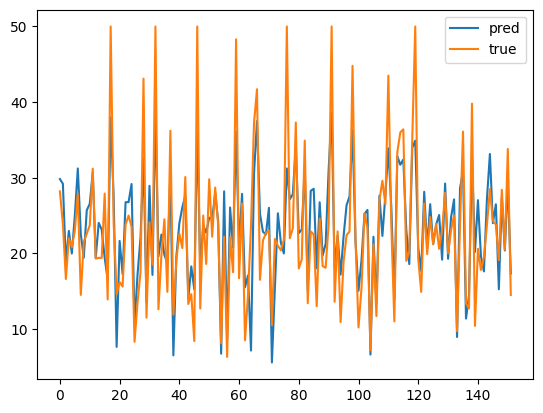

In [ ]:
# train_x에 상수항 추가 후 최귀모델 적합

fit_train1 = sm.OLS(train_y,train_x)
fit_train1 = fit_train1.fit()

# 검증데이터에 대한 예측값과 true값 비교

plt.plot(np.array(fit_train1.predict(test_x)),label = "pred")
plt.plot(np.array(test_y),label = "true")
plt.legend()
plt.show()

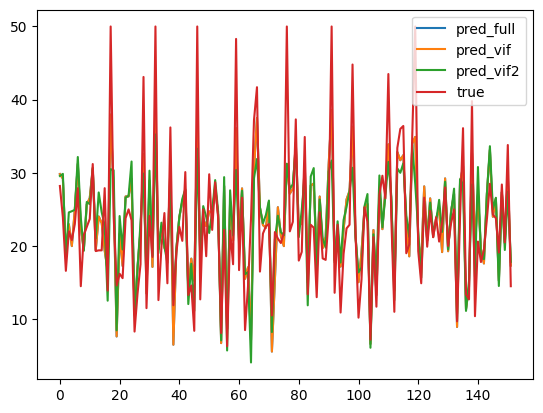

In [ ]:
# x_data3와 x_data4 학습 검증데이터 분할

X = x_data3_
y = target
train_x2,test_x2,train_y2,test_y2 = train_test_split(X,y,train_size=0.7, test_size=0.3, random_state=1)

X = x_data4_
y = target
train_x3,test_x3,train_y3,test_y3 = train_test_split(X,y,train_size=0.7, test_size=0.3, random_state=1)

# x_data3/x_data4의 회귀모델 적합 (fit_train2,fit_train3)

fit_train2 = sm.OLS(train_y2,train_x2)
fit_train2 = fit_train2.fit()

fit_train3 = sm.OLS(train_y3,train_x3)
fit_train3 = fit_train3.fit()

# vif를 통해 NOX를 지운 데이터 x_data3 , NOX,RM을 지운 데이터 x_data4 full모델 실제값 비교

plt.plot(np.array(fit_train1.predict(test_x)),label = "pred_full")
plt.plot(np.array(fit_train2.predict(test_x2)),label = "pred_vif")
plt.plot(np.array(fit_train3.predict(test_x3)),label = "pred_vif2")
plt.plot(np.array(test_y2), label = "true")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

#변수 제거가 이루어지지 않은 full모델
mse1 = mean_squared_error(y_true = test_y["Target"], y_pred = fit_train1.predict(test_x))

#변수 NOX만 제거한 모델
mse2 = mean_squared_error(y_true = test_y["Target"], y_pred = fit_train2.predict(test_x2))

#변수 NOX와 RM 두 개를 제거한 모델
mse3 = mean_squared_error(y_true = test_y["Target"], y_pred = fit_train3.predict(test_x3))

print(mse1)
print(mse2)
print(mse3)

26.14863146881989
26.14006260984655
38.788453179128304
